In [ ]:
#import pandas as pd
#import numpy as np
#from sklearn.cross_validation import train_test_split

#train, test = train_test_split(df, test_size = 0.1)
#print train.shape
#print test.shape
#test.to_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_TEST.csv")
#train.to_csv("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_TRAIN.csv")

In [ ]:
#http://www.census.gov/popest/data/index.html

In [236]:
df.columns

Index([u'Unnamed: 0', u'Date', u'Store Number', u'City', u'Zip Code',
       u'County Number', u'County', u'Category', u'Category Name',
       u'Vendor Number', u'Item Number', u'Item Description',
       u'Bottle Volume (ml)', u'State Bottle Cost', u'State Bottle Retail',
       u'Bottles Sold', u'Sale (Dollars)', u'Volume Sold (Liters)',
       u'Volume Sold (Gallons)'],
      dtype='object')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
df=pd.read_csv\
("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_train.csv")
df_test=pd.read_csv\
("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_test.csv")

In [2]:
start_time = time.time()

df=pd.read_csv\
("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_train.csv")
df_test=pd.read_csv\
("/Users/thomas/GA-DSI/projects/projects-weekly/project-03/Resources/Iowa_Liquor_sales_sample_10pct_test.csv")

"""CONVERTING DATA TO BE USABLE; DROPS ~1150 rows out of the 244000; This is acceptable"""

#Date Conversion takes 42 Seconds
df['Date']=pd.to_datetime(df['Date'])


#---
#Make these float columns; removing the 'dollar' signs
df['Sale (Dollars)']= [np.float(x[1:]) for x in df['Sale (Dollars)']]
df['State Bottle Retail']= [np.float(x[1:]) for x in df['State Bottle Retail']]
df['State Bottle Cost']= [np.float(x[1:]) for x in df['State Bottle Cost']]

#---
#There are Zip Codes with the value 712-2, which is the zip code of IA
df=df.replace("712-2","51529")

#---
#Changed Country number from float to int; there were null values before, so we took them out just above this


zips= df[pd.notnull(df["County"])].groupby(['Store Number',"County"])["County"].unique()
store=county=[]

#Splits up the groupyby appropriately
i=0
while i < len(zips):
    store.append(zips.index[i][0])
    county.append(zips.index[i][1])
    i+=1
    
#Puts the store as key and county as value
d={}
for x,y in zip(store,county):
    d[x]=y
d[5230]="Linn";d[5210]="Page";d[5227]="Clinton";d[5247]="Cerro Gordo";d[5236]="Jones";d[5217]="Wayne";
d[5220]="Cerro Gordo";d[5225]="Johnson";d[5226]="Scott";d[5222]="Linn";d[5214]="Linn";d[5240]="Cedar";
d[5233]="Marion";d[5224]="Johnson";d[5237]="Webster";d[5229]="Warren";d[5234]="Dubuque";d[5208]="Cass";
d[5218]="Lucas";d[5216]="Polk";d[5223]="Fremont";d[5232]="Audubon"
    
#Will create a new df for the store number column and overwrite previous values
#Look up every row and see if value is blank. If it is, fill it
for i in range(len(df["City"])):
    if pd.isnull(df.iloc[i,6]):
        df.iloc[i,6]=d[df.iloc[i,2]]
    


#---
#Category Fix
cat = df.set_index('Category')['Category Name'].to_frame()
cat.dropna(inplace=True)
undefined_cats = pd.DataFrame([["Moonshine"],["Reposado"],["Vodka"],["Hennessy"],["Spiced Rum"],["Rum"],\
                               ["Amaretto"],["Spirit"],["Moonshine"],["Moonshine"],["Rum"]], \
                              columns=['Category Name'], index=['1011700.0', '1022200.0', '1032100.0', '1052100.0',\
                        '1062400.0', '1062500.0', '1082100.0', '1082200.0', '1091100.0', '1091300.0', '1092100.0'])
all_cats = pd.concat([cat, undefined_cats])

def get_category_name(category):
    return all_cats.T[str(float(category))].values[0]

category_wo_name = df[pd.isnull(df["Category Name"])]["Category"].to_frame()

for row in category_wo_name.index:
    if not np.isnan(category_wo_name.ix[row]['Category']):
        df.set_value(row, 'Category Name', get_category_name(category_wo_name.ix[row]['Category']))

#---
#Delete Useless Columns
del df["County Number"]
del df["Category"]
#---
#Change city column to all uppercase
df["City"]=df["City"].apply(lambda X: X.upper())

#---
#Create dictionary to fill in the null County values for each city
print("--- %s seconds ---" % (time.time() - start_time))

--- 99.3630099297 seconds ---


In [40]:
#df1=pd.read_csv("Resources/IA_Data_1.csv")
#df2=pd.read_csv("Resources/IA_Data_2.csv")
df3=pd.read_csv("Resources/IA_Data_3.csv")
df4=pd.read_csv("Resources/IA_Data_4.csv")
df5=pd.read_csv("Resources/IA_Data_5.csv")

In [41]:
#___DF1___
start_time = time.time()
start_time2=start_time
df1=pd.read_csv("Resources/IA_Data_1.csv")
ind1=df1.iloc[0,:]
df1=df1.iloc[1:,:].reset_index()

tind1=['GEO.id','GEO.id2','GEO.display-label']
tname1=["ID","ID2","Geography"]
name=[[y,x] for x,y in zip(ind1[3:],ind1[3:].index) if "2015" in x]
tname1.extend([x[1] for x in name])
name1=tname1
tind1.extend([x[0] for x in name])
ind1=tind1
l=len("Population Estimates (as of July 1) - 2015 - ")
r=name1[0:3]
r.extend([x[l:] for x in name1[3:]])
name1=r
name1

df1=df1[ind1]
####FOCUS On renaming
df1.columns=name1

for i in range(len(df1["Geography"])):
    l=len(df1.loc[i,'Geography'])
    df1.loc[i,'Geography']=df1.loc[i,'Geography'][0:l-len(" County, Iowa")]
print("--- DF1: %s seconds ---" % (time.time() - start_time))

#___DF2___
start_time = time.time()
df2=pd.read_csv("Resources/IA_Data_2.csv")
ind2=df2.iloc[0,:]
df2=df2.iloc[1:,:]
df2.columns=ind2
df2=df2.reset_index()


for i in range(len(df2["Geography"])):
    l=len(df2.loc[i,'Geography'])
    df2.loc[i,'Geography']=df2.loc[i,'Geography'][0:l-len(" County, Iowa")]
    
print("--- DF2: %s seconds ---" % (time.time() - start_time))

#___DF3___
start_time = time.time()
df3=pd.read_csv("Resources/IA_Data_3.csv")
ind3=df3.iloc[0,:]
df3=df3.iloc[1:,:]
df3.columns=ind3
df3=df3.reset_index()


for i in range(len(df3["Geography"])):
    l=len(df3.loc[i,'Geography'])
    df3.loc[i,'Geography']=df3.loc[i,'Geography'][0:l-len(" County, Iowa")]
    
print("--- DF3: %s seconds ---" % (time.time() - start_time))


#___DF4___
start_time = time.time()
df4=pd.read_csv("Resources/IA_Data_4.csv")
ind4=df4.iloc[0,:]
df4=df4.iloc[1:,:]
df4.columns=ind4
df4=df4.reset_index()


for i in range(len(df4["Geography"])):
    l=len(df4.loc[i,'Geography'])
    df4.loc[i,'Geography']=df4.loc[i,'Geography'][0:l-len(" County, Iowa")]
    
print("--- DF4: %s seconds ---" % (time.time() - start_time))

#___DF5___
start_time = time.time()
df5=pd.read_csv("Resources/IA_Data_5.csv")
print("--- DF5: %s seconds ---" % (time.time() - start_time))

print ("--- Total Time: %s seconds ---"  % (time.time() - start_time2))

--- DF1: 0.175018072128 seconds ---
--- DF2: 35.6892409325 seconds ---
--- DF3: 0.0800459384918 seconds ---
--- DF4: 0.0758190155029 seconds ---
--- DF5: 0.000845909118652 seconds ---
--- Total Time: 36.0214040279 seconds ---


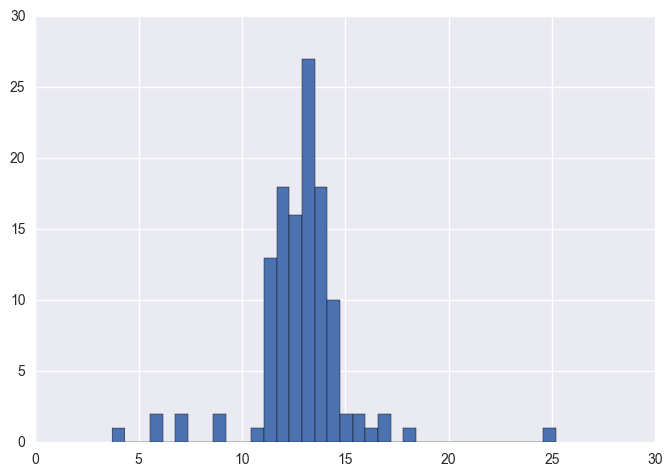

In [39]:
a=df.groupby(["County"])["Bottles Sold"].sum().to_frame()
b=df.groupby(["Zip Code"])["Store Number"].nunique().to_frame()
c=df.groupby(["Zip Code"]).agg(lambda x:\
                    (x["State Bottle Retail"]-x["State Bottle Cost"])*x["Bottles Sold"])
d=df.groupby(["Zip Code"])["State Bottle Cost"].sum().to_frame()
e=df.groupby(["Zip Code"])["State Bottle Retail"].sum().to_frame()
f=df.groupby(["County"])["Sale (Dollars)"].sum().to_frame()
#Values are representative of average bottle value
(f['Sale (Dollars)']/(a['Bottles Sold'])).sort_values().hist(bins=35)
plt.show()
#c.sort_values().to_frame()

Best Performing stores:
    High Profits
    Low Competition
    Large Local Customer Base
    
Metrics:
    Sales per store by Zipcode
    Stores per Capita
    Income 
    

In [31]:
df.columns

Index([u'Unnamed: 0', u'Date', u'Store Number', u'City', u'Zip Code',
       u'County', u'Category Name', u'Vendor Number', u'Item Number',
       u'Item Description', u'Bottle Volume (ml)', u'State Bottle Cost',
       u'State Bottle Retail', u'Bottles Sold', u'Sale (Dollars)',
       u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [4]:
print min(df['Date'])
print max(df['Date'])
print max(df['Date'])-min(df['Date'])

2015-01-05 00:00:00
2016-03-31 00:00:00
451 days 00:00:00
